Team Member:
- Jian Guo
- Jiaqing Ji
- Huijun Wang
- Jianye Liu

<h1>Lab Assignment Three: Extending Logistic Regression</h1>

<h2>1. Business Understanding</h2>

With the continuous improvement of people’s living standards, wine has become more and more popular among people and the attention about Wine's quality production is growing as well. However, the quality of the wine is still only determined by wine tasters’ grading, which is obviously difficult to meet the needs of today’s market. Many scholars use data mining algorithms (such as Logistic multinomial model, artificial neural network, support vector machine, decision tree, Bagging, nearest neighbor algorithm) to predict the wine quality. But the results are not far from the expectation.

In this lab, we focused on the Red Wine Quality Dataset from the UCI Machine Learning Depository. After spending a lot of time playing around with this dataset during the past two weeks, we trained and tuned three models - stochastic, newton and steepest. We use these three models to predict the quality of red wine and make some comparations. The results will help buyers, sellers, collectors and makers to judge the quality of wines.

Red Wine Quality Dataset has 1599 instances and 11 input attributes and 1 output attribute. Several of the attributes may be correlated, thus it makes sense to apply some sort of feature selection. The 11 attributes are ingredients contain in wines such as fixed acidity, volatile acidity, citric acid, ph, alcohol and so on, which will influence taste, color and flavor of wines.  This datasets can be viewed as classification or regression tasks. What's more, the classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones). So we will re-grade the quality of the wine from six levels to four levels - low level, lower middle level, upper middle level and high level.

Through visualizing the features, exploring the features relationships, and contributing models, we are able to classify wines into four different levels according to 11 input attributes. We will figure out the influence of each attribute to the quality of wines. 

As a result, we are able to help makers to know the influence of different ingredients on quality of red wine, so that they will know how to adjust physical and chemical indicators to product different quality wines. Then, winemakers will know how to regulate wine prices reasonably. And this will also be able to help collectors and tasters to know the correlation between quality and these physical and chemical indicators. This method will help them identify the quality of wines more scientifically.

By using these models we created, the buyers and collectors could have an idea what is the most appropriate wine they can buy or send to friends as a gift. Winemakers will figure out how to adjust physical and chemical indicators to produce different quality wines. In addition, people who would like to become a taster could make a comparation that whether they could grade the wine to achieve the accuracy maximization.


========================================================================

Dataset: Red Wine database URL: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009/data

Question Of Interest: How can we predict the quality of red wine accurately?

<h2>2. Data Understanding</h2>
<h3>2.1 Data Description</h3>

First, We will load the required libraries and import the data into jupyter directly from kaggle.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("winequality-red.csv")

In [2]:
%matplotlib inline
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

The following tells us there are 1599 instances and 11 input attributes and 1 output attribute. The response variable is quality. The eleven predictor variables are of the numeric class and the response variable, quality, is of the integer class. And the data is clean, there is no missing attribute values.

In [3]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Here, we rename every column, which can be useful to be called in the following analysis.

In [4]:
data.columns = ['FixedAcidity', 'VolatileAcidity', 'CitricAcid', 'ResidualSugar', 'Chlorides', 'FreeSulfurDioxide', 'TotalSulfurDioxide', 'Density', 'PH', 'Sulphates', 'Alcohol', 'Quality']
data.describe()

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## 2.2 Data Selection

It's clear from the folllowing table that there is a big class imbalance. There are 1599 samples but only 10 are of the 3 class and only 18 are of the 8 class. There are much more normal wines than excellent or poor ones. There are not enough samples of those classes to split the data into usable training and test sets.

So we will make changes to the classes by merging classes to deal with the class imbalances. For now, we need to re-grade the quality of the wine evenly.

In [5]:
data['Quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: Quality, dtype: int64

After calculating, there are much more normal wines than excellent or poor ones, we merge the low level wines together and merge the high level wines together.
So we re-grade the quality of wines from six levels to four levels - low level, lower middle level, upper middle level and high level. We use the integer '1 2 3 4' to represent the quality level of wine from lowest to highest. 
Then we will visualize the data more accurately.

In [6]:
def label_quality (row):
   if (row['Quality'] > 2) & (row['Quality'] <= 4):      
      return 1
   elif (row['Quality'] > 4) & (row['Quality'] <= 5):      
      return 2
   elif (row['Quality'] > 5) & (row['Quality'] <= 6):      
      return 3
   else:     
      return 4
data['Quality'] = data.apply (lambda row: label_quality (row),axis=1)

In [7]:
data['Quality'].value_counts()

2    681
3    638
4    217
1     63
Name: Quality, dtype: int64

After merging some classes, the new classes seem like appropriate and even.

In [8]:
data.describe()

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,2.631019
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.763818
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,1.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,2.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,3.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,3.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,4.000000


In [9]:
print("ResidualSugar: ", data.loc[data.ResidualSugar > 10].count()['ResidualSugar'])

ResidualSugar:  11


As we can see from the data description, many attributes seem like to contain outliers. For example, as for residual sugar, 75% of residual sugar is 2.6, while the max value is 15.5. So I count the number of residual sugar when it is bigger than 10. There are only 11 samples, which are outliers.
However, the UCI wine dataset was cleaned prior to its posting, so we don’t think they are errors. We will figure it out in the following analysis.

# 3 Data Visualization

To visualize the data, we plot a heatmap to see the correlationship among these attributes

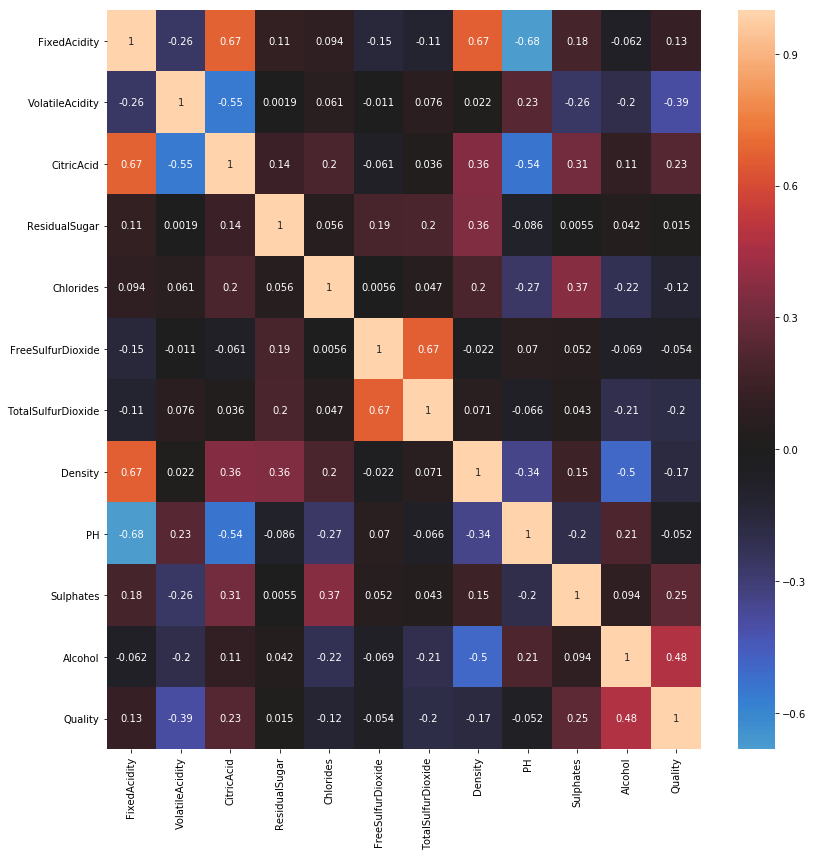

In [10]:
f, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(data.corr(), annot=True, center=0)

f.tight_layout()

According to the heatmap, we can see many things.
Firstly, there is a strong and positive correlations between volatile acidity and citric acidity. And fixed acidity and desity has a strong positive correlations. What's more, there is a strong and negative correlations between fixed acidity and PH. 
According to these correlations displaying in the heatmap, we can see that there is a strong and positive correlations between fixed acidity and density, between fixed acidity and citric acidity, between fixed acidity and density. While there is a strong and negative correlationships between volatile acidity and citric acidity, between PH and fixed acidity, between PH and citric acidity.
Above all, these correlationships indicate that there is a high correlation between some physical and chemical indexes and chemical composition in wine.
Then we will mainly analysis these correlations.

In [11]:
data.head()

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


## 3.1 Quality VS Volatile Acidity

Volatile acidity refers to the steam distillable acids present in wine, primarily acetic acid but also lactic, formic, butyric, and propionic acids. 

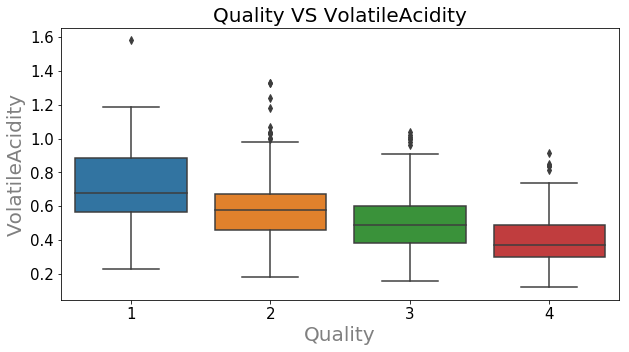

In [12]:
plt.figure(figsize=(10, 5))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim((0, 25000))
plt.title('Quality VS VolatileAcidity', fontsize=20)
plt.xlabel('$VolatileAcidity$', fontsize=20, color='gray')
plt.ylabel('$Quality$', fontsize=20, color='gray')
sns.boxplot(x='Quality',y='VolatileAcidity',data=data)

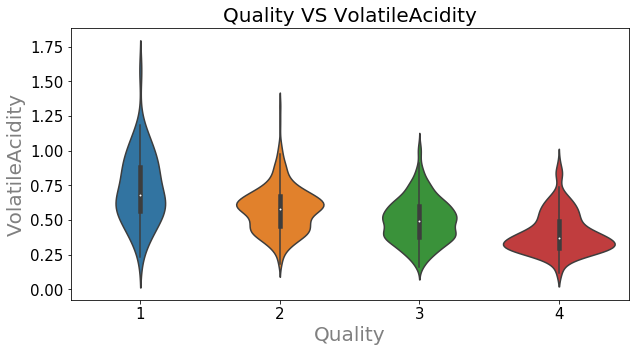

In [13]:
plt.figure(figsize=(10, 5))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim((0, 25000))
plt.title('Quality VS VolatileAcidity', fontsize=20)
plt.xlabel('$VolatileAcidity$', fontsize=20, color='gray')
plt.ylabel('$Quality$', fontsize=20, color='gray')
sns.violinplot(x='Quality',y='VolatileAcidity',data=data)

What we can see from the boxplot and violinplot is that there is a strong and negative correlationship between quality and volatile acidity, just as the heatmap shows, is -0.39. The more volatile acidity contains in the wine, the lower quality the wine is. And the volatile acidity of mostly high quality wine is between 0.25 and 0.50. 

In [14]:
 def label_VolatileAcidity(row):
   if(row['VolatileAcidity']>0.11) & (row['VolatileAcidity'] <=0.39):
     return '0.11~0.39'
   if(row['VolatileAcidity']>0.39) & (row['VolatileAcidity'] <=0.52):
     return '0.39~0.52'
   if(row['VolatileAcidity']>0.52) & (row['VolatileAcidity'] <=0.64):
     return '0.52~0.0.64'
   if(row['VolatileAcidity']>0.64) & (row['VolatileAcidity'] <=1.58):
     return '0.64~1.58'
   return 0
data['VolatileAciditygrp'] = data.apply(lambda row: label_VolatileAcidity(row),axis=1)

In [15]:
data.head()

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Quality,VolatileAciditygrp
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2,0.64~1.58
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2,0.64~1.58
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2,0.64~1.58
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3,0.11~0.39
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2,0.64~1.58


Class Distribution
Quality
1     63
2    681
3    638
4    217
Name: VolatileAciditygrp, dtype: int64

Class Distribution Grouped by Number of VolatileAciditygrp
Quality              1    2    3    4
VolatileAciditygrp                   
0.11~0.39            5   92  185  124
0.39~0.52            9  165  186   50
0.52~0.0.64         14  210  156   27
0.64~1.58           35  214  111   16


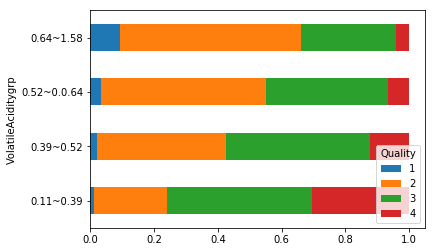

In [16]:
data_grouped_by_Quality = data.groupby(by=["Quality"])
VolatileAciditygrp_by_Quality = pd.crosstab([data["VolatileAciditygrp"]], data.Quality)

print("Class Distribution")
print(data_grouped_by_Quality.VolatileAciditygrp.count())
print("\nClass Distribution Grouped by Number of VolatileAciditygrp")
print(VolatileAciditygrp_by_Quality)

VolatileAciditygrp_percentage = VolatileAciditygrp_by_Quality.div(VolatileAciditygrp_by_Quality.sum(axis=1).astype(float),
                             axis=0) # normalize the value

VolatileAciditygrp_percentage.plot(kind="barh", stacked=True);

As the volatile acidity percentage plot shows, whatever the volatile acidity contains in wines, the mojority percentage of wines is normal wines.

Class Distribution
VolatileAciditygrp
0.11~0.39      406
0.39~0.52      410
0.52~0.0.64    407
0.64~1.58      376
Name: Quality, dtype: int64

Class Distribution Grouped by Number of Quality
VolatileAciditygrp  0.11~0.39  0.39~0.52  0.52~0.0.64  0.64~1.58
Quality                                                         
1                           5          9           14         35
2                          92        165          210        214
3                         185        186          156        111
4                         124         50           27         16


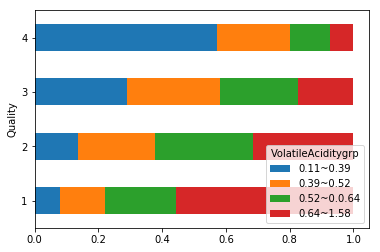

In [17]:
data_grouped_by_VolatileAciditygrp = data.groupby(by=["VolatileAciditygrp"])
Quality_by_VolatileAciditygrp = pd.crosstab([data["Quality"]], data.VolatileAciditygrp)

print("Class Distribution")
print(data_grouped_by_VolatileAciditygrp.Quality.count())
print("\nClass Distribution Grouped by Number of Quality")
print(Quality_by_VolatileAciditygrp)

Quality_percentage = Quality_by_VolatileAciditygrp.div(Quality_by_VolatileAciditygrp.sum(axis=1).astype(float),
                             axis=0) # normalize the value

Quality_percentage.plot(kind="barh", stacked=True);

As the volatile aciditygrp percentage plot shows, most of high level wines contain lower volatile acidity, while most of low level wines contain higher volatile acidity.

## 3.2 Quality VS Citric Acidity

Citric acid plays a major role in the biochemisty of the grape vine and bacteria. It is an intermediate in the TCA cycle, which provides molecular energy for cellular function.

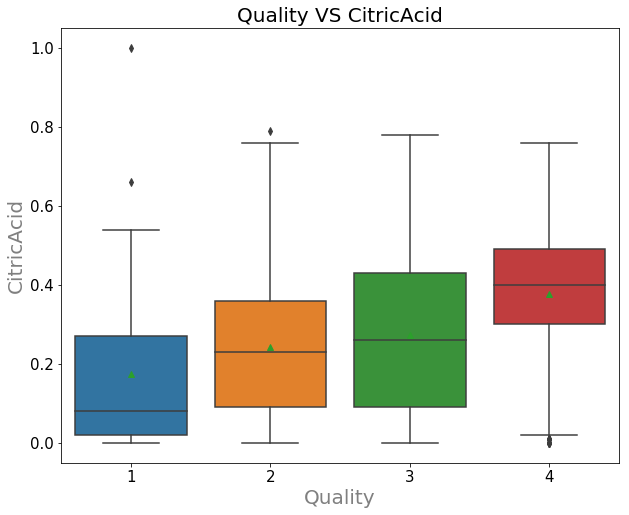

In [18]:
plt.figure(figsize=(10, 8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim((0, 1.0))
plt.title('Quality VS CitricAcid', fontsize=20)
plt.xlabel('$Quality$', fontsize=20, color='gray')
plt.ylabel('$CitricAcid$', fontsize=20, color='gray')
sns.boxplot(x='Quality', y='CitricAcid', data=data, sym='r*', meanline=False, showmeans=True)

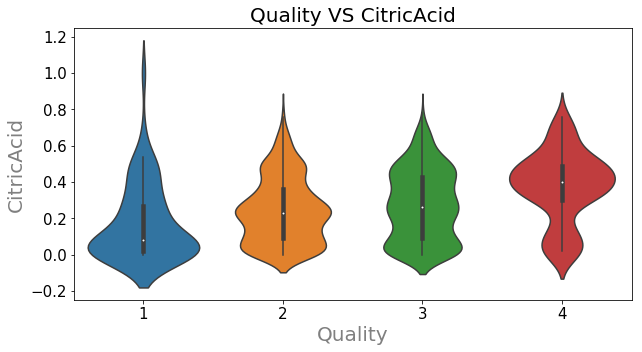

In [19]:
plt.figure(figsize=(10, 5))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim((0, 25000))
plt.title('Quality VS CitricAcid', fontsize=20)
plt.xlabel('$CitricAcid$', fontsize=20, color='gray')
plt.ylabel('$Quality$', fontsize=20, color='gray')
sns.violinplot(x='Quality',y='CitricAcid',data=data)

As we can see in the boxplot and violinplot, there is a strong and positive correlationship between quality and citric acidity. The more citric acidity contains in wine, the higher quality the wine belongs to. Just as it shows in the heatmap, the positive correlationship is 0.23. 

In [20]:
 def label_CitricAcid(row):
   if(row['CitricAcid']>=0) & (row['CitricAcid'] <=0.090):
     return '0.00~0.090'
   if(row['CitricAcid']>0.090) & (row['CitricAcid'] <=0.260):
     return '0.090~0.260'
   if(row['CitricAcid']>0.260) & (row['CitricAcid'] <=0.420):
     return '0.260~0.0.420'
   if(row['CitricAcid']>0.420) & (row['CitricAcid'] <=1.00):
     return '0.420~1'
   return 0
data['CitricAcidgrp'] = data.apply(lambda row: label_CitricAcid(row),axis=1)

Class Distribution
Quality
1     63
2    681
3    638
4    217
Name: CitricAcidgrp, dtype: int64

Class Distribution Grouped by Number of CitricAcidgrp
Quality         1    2    3   4
CitricAcidgrp                  
0.00~0.090     36  173  163  31
0.090~0.260    10  246  158  15
0.260~0.0.420   8  133  152  76
0.420~1         9  129  165  95


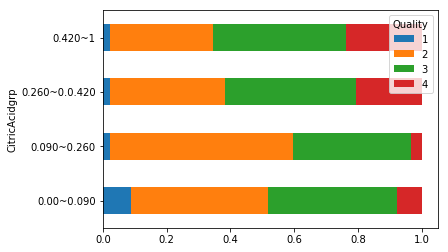

In [21]:
data_grouped_by_Quality = data.groupby(by=["Quality"])
CitricAcidgrp_by_Quality = pd.crosstab([data["CitricAcidgrp"]], data.Quality)

print("Class Distribution")
print(data_grouped_by_Quality.CitricAcidgrp.count())
print("\nClass Distribution Grouped by Number of CitricAcidgrp")
print(CitricAcidgrp_by_Quality)

CitricAcidgrp_percentage = CitricAcidgrp_by_Quality.div(CitricAcidgrp_by_Quality.sum(axis=1).astype(float),
                             axis=0) # normalize the value

CitricAcidgrp_percentage.plot(kind="barh", stacked=True);

Class Distribution
CitricAcidgrp
0.00~0.090       403
0.090~0.260      429
0.260~0.0.420    369
0.420~1          398
Name: Quality, dtype: int64

Class Distribution Grouped by Number of CitricAcidgrp
CitricAcidgrp  0.00~0.090  0.090~0.260  0.260~0.0.420  0.420~1
Quality                                                       
1                      36           10              8        9
2                     173          246            133      129
3                     163          158            152      165
4                      31           15             76       95


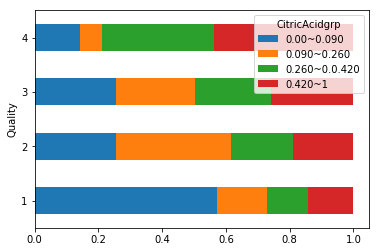

In [22]:
data_grouped_by_CitricAcidgrp = data.groupby(by=["CitricAcidgrp"])
Quality_by_CitricAcidgrp = pd.crosstab([data["Quality"]], data.CitricAcidgrp)

print("Class Distribution")
print(data_grouped_by_CitricAcidgrp.Quality.count())
print("\nClass Distribution Grouped by Number of CitricAcidgrp")
print(Quality_by_CitricAcidgrp)

Quality_percentage = Quality_by_CitricAcidgrp.div(Quality_by_CitricAcidgrp.sum(axis=1).astype(float),
                             axis=0) # normalize the value

Quality_percentage.plot(kind="barh", stacked=True);

As the citric acidity percentage plot shows, in most of high level wines, the citric acidity content is between 0.26 and 1.00. While in most low level wines, the citric acidity content is between 0 and 0.09.

## 3.3 Quality vs Alcohol

From the Heatmap we can acquire that corrrelation coefficient between Quality and Alcohol is 0.48. So we want to explore some obvious relation between Quality and Alcohol and display some figures to make these two factors more intuitive.From the descirbe of our dataset. We know that the range of Alcohol from 8.4 to 14.9 and the mean of value is 10.42. We can divided the value of Alcohol into 7 groups. let's take a look at quality vs value of Alcohol.

In [23]:
def label_Alcohol (row):
   if (row['Alcohol'] > 8) & (row['Alcohol'] <= 9):      
      return '8-9'
   elif (row['Alcohol'] > 9) & (row['Alcohol'] <= 10):      
      return '9-10'
   elif (row['Alcohol'] > 10) & (row['Alcohol'] <= 11):      
      return '10-11'
   elif (row['Alcohol'] > 11) & (row['Alcohol'] <= 12):
      return '11-12'
   elif (row['Alcohol'] > 12) & (row['Alcohol'] <= 13):
      return '12-13'
   elif (row['Alcohol'] > 13) & (row['Alcohol'] <= 14):
      return '13-14'
   else:     
      return '14-15'
data['Alcoholgrp'] = data.apply (lambda row: label_Alcohol (row),axis=1)
data.head()

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Quality,VolatileAciditygrp,CitricAcidgrp,Alcoholgrp
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2,0.64~1.58,0.00~0.090,9-10
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2,0.64~1.58,0.00~0.090,9-10
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2,0.64~1.58,0.00~0.090,9-10
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3,0.11~0.39,0.420~1,9-10
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2,0.64~1.58,0.00~0.090,9-10


In [24]:
data['Alcoholgrp'].value_counts()

9-10     710
10-11    444
11-12    267
12-13    118
8-9       37
13-14     22
14-15      1
Name: Alcoholgrp, dtype: int64

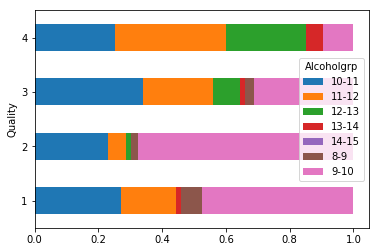

In [25]:
data_grouped_by_Alcoholgrp = data.groupby(by=["Alcoholgrp"])
Quality_by_Alcoholgrp = pd.crosstab([data["Quality"]], data.Alcoholgrp)
Quality_percentage = Quality_by_Alcoholgrp.div(Quality_by_Alcoholgrp.sum(axis=1).astype(float),
                             axis=0)

Quality_percentage.plot(kind="barh", stacked=True);

Based on the figure above. We can see that the percentage of qualities are different from the Alcohol groups. The figure indicate that the percetage of alcohol value between 12 to 14 is increasing along with the increase of quality. None of quality 1 wines' alcohol value is between 12 and 13. Most of good qulaity wines' alcohol is between 11 and 14. It seems that good qulity wines has a stronger alcohol content.    

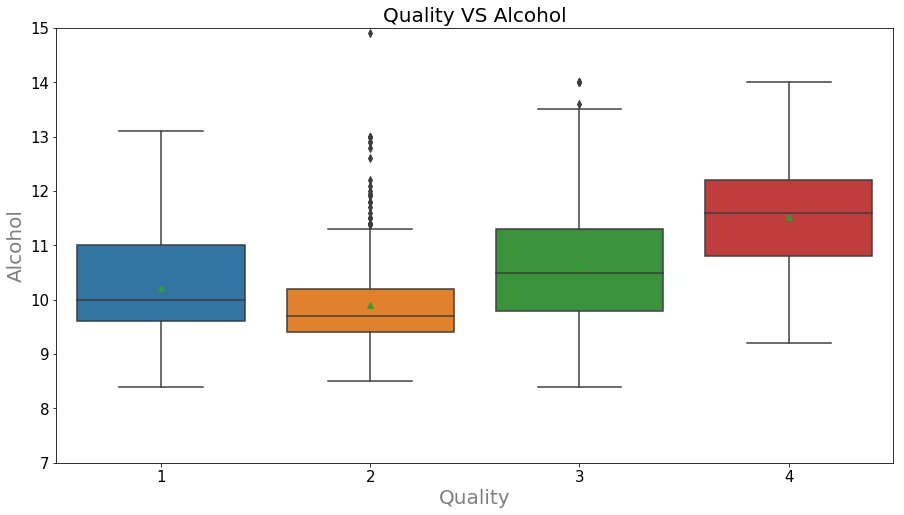

In [26]:
plt.figure(figsize=(15, 8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim((7.0, 15.0))
plt.title('Quality VS Alcohol', fontsize=20)
plt.xlabel('$Quality$', fontsize=20, color='gray')
plt.ylabel('$Alcohol$', fontsize=20, color='gray')
sns.boxplot(x='Quality', y='Alcohol', data=data, sym='r*', meanline=False, showmeans=True)

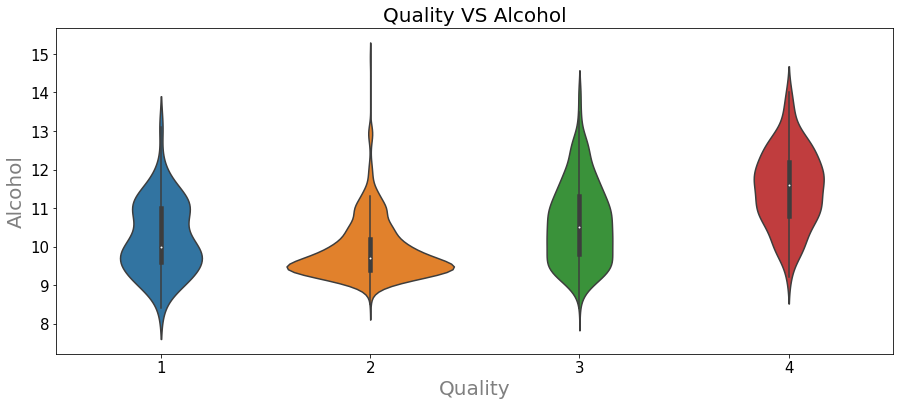

In [27]:
plt.figure(figsize=(15, 6))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim((6.0, 15.0))
plt.title('Quality VS Alcohol', fontsize=20)
plt.xlabel('$Quality$', fontsize=20, color='gray')
plt.ylabel('$Alcohol$', fontsize=20, color='gray')
sns.violinplot(x='Quality',y='Alcohol',data=data)

From the two figures we can see that there is a strong positive correlation between Alcohol Content and Quality.It is obvious that all alcohol content of wines which in the quality group 4 are more than 9. It is interesting that the range of alcohol content in quality group 2 are the largest. Some wines'alcohol content in quality 2 are beyond 13 and some winies' alcohol content in quality 2 are lower than 9. Ideal alcohol content varies by type of wine and individual taste. Taste testing has found that the ideal alcohol content averages around 13.6.

## 3.4 Quality VS Sulphates

From the Heatmap, we can see that the correlation factor between Quality and Sulphates is 0.25. So we also want some intuitive figures to display the relation between Quality and Sulphates. Based on the descirbe of our dataset, We can see that the max value of sulphates is 2.0 and the minimum value of sulphates is 0.33. So we can divide the value into 6 groups and take a look at Quality VS Sulphates.

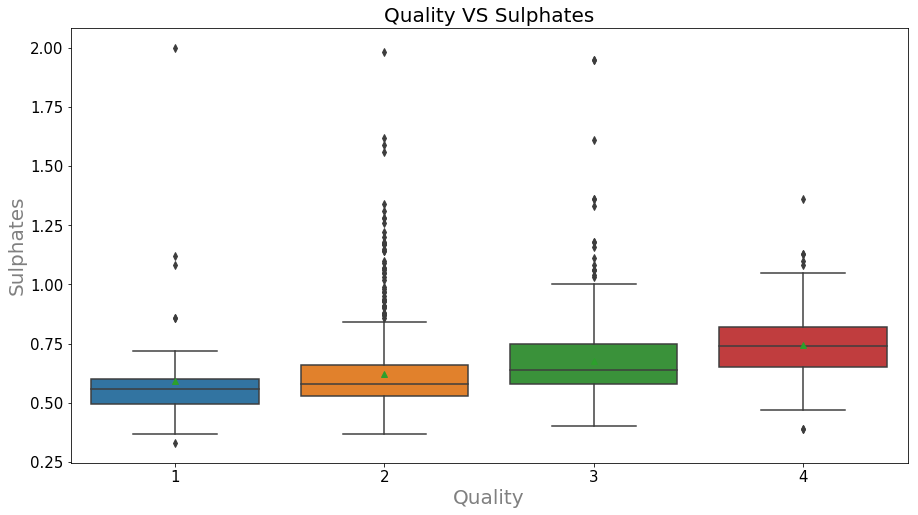

In [28]:
plt.figure(figsize=(15, 8))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Quality VS Sulphates', fontsize=20)
plt.xlabel('$Quality$', fontsize=20, color='gray')
plt.ylabel('$Sulphates$', fontsize=20, color='gray')
sns.boxplot(x='Quality', y='Sulphates', data=data, sym='r*', meanline=False, showmeans=True)

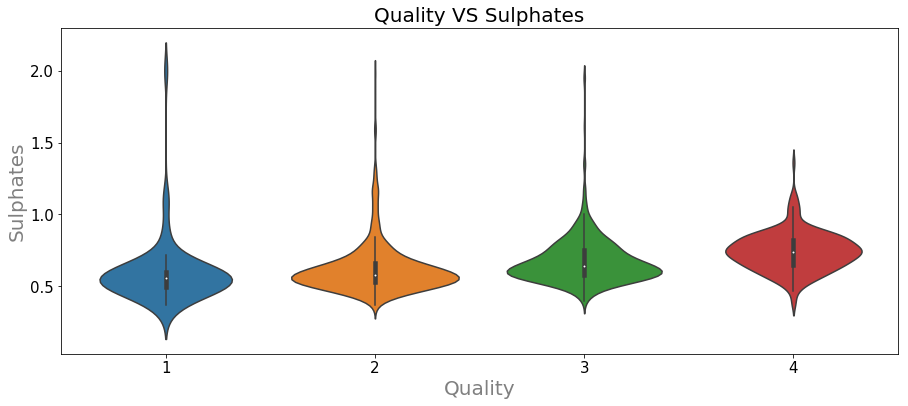

In [29]:
plt.figure(figsize=(15, 6))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim((6.0, 15.0))
plt.title('Quality VS Sulphates', fontsize=20)
plt.xlabel('$Quality$', fontsize=20, color='gray')
plt.ylabel('$Sulphates$', fontsize=20, color='gray')
sns.violinplot(x='Quality',y='Sulphates',data=data)

It is obvious from the two figures that the quality of wine will increase along with the increasing concentration of sulphates.Sulphates plays an important role in preventing oxidization and maintaining a wine's freshness. A good quality wine must be less oxidization and more freshness. So the more Sulphates have in wines,the best the wines quality are.  

In [30]:
def label_sulphates (row):
   if (row['Sulphates'] > 0.3) & (row['Sulphates'] <= 0.6):      
      return '0.3-0.6'
   elif (row['Sulphates'] > 0.6) & (row['Sulphates'] <= 0.9):      
      return '0.6-0.9'
   elif (row['Sulphates'] > 0.9) & (row['Sulphates'] <= 1.2):      
      return '0.9-1.2'
   elif (row['Sulphates'] > 1.2) & (row['Sulphates'] <= 1.5):
      return '1.2-1.5'
   elif (row['Sulphates'] > 1.5) & (row['Sulphates'] <= 1.8):
      return '1.5-1.8'
   else :
      return '1.8-2.1'
data['Sulphatesgrp'] = data.apply (lambda row: label_sulphates (row),axis=1)
data.head()

,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,PH,Sulphates,Alcohol,Quality,VolatileAciditygrp,CitricAcidgrp,Alcoholgrp,Sulphatesgrp
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2,0.64~1.58,0.00~0.090,9-10,0.3-0.6
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2,0.64~1.58,0.00~0.090,9-10,0.6-0.9
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2,0.64~1.58,0.00~0.090,9-10,0.6-0.9
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3,0.11~0.39,0.420~1,9-10,0.3-0.6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2,0.64~1.58,0.00~0.090,9-10,0.3-0.6


In [31]:
data['Sulphatesgrp'].value_counts()

0.6-0.9    774
0.3-0.6    723
0.9-1.2     84
1.2-1.5     10
1.8-2.1      4
1.5-1.8      4
Name: Sulphatesgrp, dtype: int64

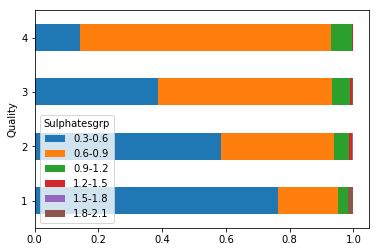

In [32]:
data_grouped_by_Sulphatesgrp = data.groupby(by=["Sulphatesgrp"])
Quality_by_Sulphatesgrp = pd.crosstab([data["Quality"]], data.Sulphatesgrp)
Quality_percentage = Quality_by_Sulphatesgrp.div(Quality_by_Sulphatesgrp.sum(axis=1).astype(float),
                             axis=0)

Quality_percentage.plot(kind="barh", stacked=True);

It is indicate the percentage of qualities are different from the Sulphates.No wines which in quality group 4 exist in sulphates group from 1.5 to 2.1. Wines which in quality group 3 exist in every range of sulphates. In sulpphates group 1.5-1.8, most wines belong to quality group 1. Sulphates play an important role in every quality of wines. 

In [33]:
data.drop(['VolatileAciditygrp','CitricAcidgrp','Alcoholgrp','Sulphatesgrp'],axis=1,inplace = True)

Drop all columns which we generated for visualizazion.

# 4 Divide the Data

A convenient way to randomly partition this dataset into a separate test and training dataset is to use the train_test_split function from scikit-learn's cross_validation submodule.

In [34]:
X = data.drop('Quality', axis=1)
y = data['Quality']

First, we assigned the Numpy array representation of feature columns 0-10 to the variable x, and we assigned the class labels from the last column to the variable y. Then we used the train_test_split function to randomly split x and y into seperate training and test datasets. 

Because we gonna test if 80/20 is a good split proportion for these four dataset. We will adjust the test size from 5% to 40% with interval of 5%, which will be assigned to X_test and y_test. And the remaining percent of the red wine samples were assigned to X_train and y_train, respectively. In order to find out under which proportion, the logistic regression will give us a better accuracy. We will use sklearn's cross_validation model to test that.
In practice, the most commonly used splits are 60:40, 70:30, or 80:20, depending on the size of the initial dataset. However, for large datasets, 90:10 or 99:1 splits into training and test subsets are also common and appropriate. As for our dataset, there are 1599 instances, so we will test and compare different splits' accuracy, just as the following boxplot displays.

In [35]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression as SKLogisticRegression
import time

test_size = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
splitdic = dict()
for size in test_size:
    splitdic[size] = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size)
        y_train = y_train.as_matrix()
        y_test = y_test.as_matrix()
        wine_sk = SKLogisticRegression() # all params default
        wine_sk.fit(X_train,y_train)
        # print(np.hstack((wine_sk.intercept_[:,np.newaxis],wine_sk.coef_)))
        yhat = wine_sk.predict(X_test)
        splitdic[size].append(accuracy_score(y_test,yhat))

/Users/jianguo/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


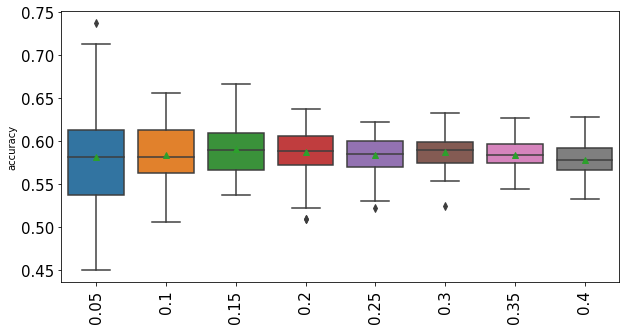

In [36]:
splitdf=pd.DataFrame(splitdic)
plt.figure(figsize=(10, 5))
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('accuracy')
sns.boxplot( data=splitdf, meanline=False, showmeans=True)

- If we are dividing a dataset into training and test datasets, we have to keep in mind that we are withholding valuable information that the learning algorithm could benefit from. Thus we don't want to allocate too much information to the test set. However, the smaller the test set, the more inaccurate the estimation of the generalization error. Dividing a dataset into training and test sets is all about balancing this trade-off.
- From the box plot, we can see the average accurage is pretty close for thest 8 differnt splits, even when I tested with different splits manually, there's no gurantee one split could always get the best accuracy, so there's no strong for or against 80/20 here, we pick 80/20 as our split size because this is one of most common used splits.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

y_train = y_train.as_matrix()
y_test = y_test.as_matrix()

In [38]:
%%time

wine_sk = SKLogisticRegression() # all params default

wine_sk.fit(X,y)
yhat = wine_sk.predict(X)
print('Using on the whole dataset will have an accuracy of: ',accuracy_score(y,yhat))

Using on the whole dataset will have an accuracy of:  0.587867417136
CPU times: user 27.5 ms, sys: 2.3 ms, total: 29.8 ms
Wall time: 27.9 ms


In [39]:
%%time

wine_sk_part = SKLogisticRegression() # all params default

wine_sk_part.fit(X_train,y_train)
yhat = wine_sk_part.predict(X_test)
print('Using on the train dataset will have an accuracy of: ',accuracy_score(y_test,yhat))

Using on the train dataset will have an accuracy of:  0.540625
CPU times: user 39.7 ms, sys: 4.21 ms, total: 43.9 ms
Wall time: 44.6 ms


As the accuracy showing above, the entire dataset has a similar accuracy with the training dataset.The accuracy of the whole dataset is 0,5878, and the accuracy of the train dataset is 0.5406. This means that 80/20 is a good split proportion.

# 5 Modeling the data

## 5.1 Create a custom, one-versus-all logistic regression classifier

We first define a python class called RegularizedBinaryLogisticRegression, it can take parameters like:
<br>1: iterations, which indicates how many gradient-calculation and moving step we are going to do to determine the weight vector for prediction.
<br>2: eta, which is how long will we go along each gradient we calculated. 
<br>3: reg, which what kind of regulation we will use in gradient calculation to avoid overfit of the sigmoid function.
<br>4: method, which is the 3 get gradient method we overwrite based on the method given to us by the instructor. 

In [40]:
from scipy.special import expit
from numpy.linalg import pinv
from scipy.optimize import fmin_bfgs

np.seterr(over='print')

class RegularizedBinaryLogisticRegression:
    # extend init functions
    def __init__(self, eta=0.1, iterations=20,method="steepest", reg='l2', C=0.0, **kwds):        
        # need to add to the original initializer 
        self.C = C
        self.eta = eta
        self.iters = iterations 
        self.method = method
        self.reg = reg
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Regularized Vector Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Regularized Vector Binary Logistic Regression Object'
        
    # convenience, private:
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))
    
    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    @staticmethod
    def objective_function(w,X,y,C):
        g = expit(X @ w)
        return -np.sum(np.log(g[y==1]))-np.sum(np.log(1-g[y==0])) + C*sum(w**2) #-np.sum(y*np.log(g)+(1-y)*np.log(1-g))

    @staticmethod
    def objective_gradient(w,X,y,C):
        g = expit(X @ w)
        ydiff = y-g # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0)
        gradient = gradient.reshape(w.shape)
        gradient[1:] += -2 * w[1:] * C
        return -gradient
    
    # public:
    def predict_proba(self,X,add_bias=True):
        # add bias term if requested
        Xb = self._add_bias(X) if add_bias else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction
        

    def _get_gradient_steepest(self,X,y):
        ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through          
        
        gradient[1:] += -2 * self.w_[1:].ravel().T * self.C    
        return gradient.reshape(self.w_.shape)
    
    def _get_gradient_stochastic(self,X,y):
        idx = int(np.random.rand()*len(y)) # grab random instance
        ydiff = y[idx]-self.predict_proba(X[idx],add_bias=False) # get y difference (now scalar)
        gradient = X[idx] * ydiff[:,np.newaxis] # make ydiff a column vector and multiply through
        
        return gradient.reshape(self.w_.shape)
        
        
    def _get_gradient_hessian(self,X,y):
        g = self.predict_proba(X,add_bias=False).ravel() # get sigmoid value for all classes
        hessian = X.T @ np.diag(g*(1-g)) @ X - 2 * self.C # calculate the hessian

        ydiff = y-g # get y difference
        gradient = np.sum(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        gradient = gradient.reshape(self.w_.shape)
        
        return pinv(hessian) @ gradient  
    
    def _regulize(self, gradient):
        if self.reg == "L2":
            gradient[1:] += -2 * self.w_[1:].ravel().T * self.C  
        elif self.reg == "L1":
            gradient[1:] += np.absolute(self.w_[1:].ravel().T) * self.C  # exclude bias term
        elif self.reg == "L1L2":
            gradient[1:] += (np.absolute(self.w_[1:].ravel().T) * self.C) + (-2 * self.w_[1:].ravel().T * self.C)
        else:
            pass      
        return gradient
    
    def _get_gradient(self,X,y):
        #we will use stochastic, steepest and bfgs for the comparision, but we did implement hessian solution.
        if self.method == "stochastic":
            gradient = self._get_gradient_stochastic(X, y)
        elif self.method == "hessian":
            gradient = self._get_gradient_hessian(X, y)
        elif self.method == "steepest":
            gradient = self._get_gradient_steepest(X, y)
        else:
            raise ValueError('This method cannot be recognized.')
        return self._regulize(gradient)
       
    # public:
    def fit(self, X, y):
        if(self.method == 'bfgs'):
            Xb = self._add_bias(X) # add bias term
            num_samples, num_features = Xb.shape

            self.w_ = fmin_bfgs(self.objective_function, # what to optimize
                                np.zeros((num_features,1)), # starting point
                                fprime=self._regulize(self.objective_gradient), # gradient function
                                args=(Xb,y,self.C), # extra args for gradient and objective function
                                gtol=1e-03, # stopping criteria for gradient, |v_k|
                                maxiter=self.iters, # stopping criteria iterations
                                disp=False)

            self.w_ = self.w_.reshape((num_features,1))
        else:
            Xb = self._add_bias(X) # add bias term
            num_samples, num_features = Xb.shape

            self.w_ = np.zeros((num_features,1)) # init weight vector to zeros

            # for as many as the max iterations
            for _ in range(self.iters):
                gradient = self._get_gradient(Xb,y)
                self.w_ += gradient*self.eta # multiply by learning rate 

Next step is to create a custom, one-versus-all logistic regression classifier. For each result type, we can built a classifier between this type and all other types, which is 'one-versus-all', stack the result together and select the best result along each row. In this way we can call binary logistic regression several times to implement a multiple class logistic regression.

In [41]:
class RegularizedLogisticRegression:
    def __init__(self, eta=0.1, iterations=20,method="steepest", reg='l2', C=0.0, **kwds):        
        self.C = C
        self.eta = eta
        self.iters = iterations 
        self.method = method
        self.reg = reg
        
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    def get_params(self, deep=True):
        return {"method": self.method, "C": self.C, "reg": self.reg, "iters": self.iters, "eta": self.eta}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            self.__setattr__(parameter, value)
        return self
    
    def score(self, X, y):
        y_hat = self.predict(X)
        return accuracy_score(y,y_hat)
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = y==yval # create a binary problem
            # train the binary classifier for this class
            blr = RegularizedBinaryLogisticRegression(eta=self.eta,
                                                      iterations=self.iters,
                                                      method=self.method,
                                                      reg=self.reg,
                                                      C=self.C)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for blr in self.classifiers_:
            probs.append(blr.predict_proba(X)) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):
        return np.argmax(self.predict_proba(X),axis=1) # take argmax along row

## 5.2 Achieve better performance by adjust parameters

We want to find out the parameters for each get_gradient method to achieve the best performance, the first thought is to adjust one parameter in a range, visualization the accuracy and see if we can get some conclusion. 
<br>We will adjust parameter C, which is the coefficient of the regulation method, from 0 to 1 with a interval of 0.01, to get the accuracy of each method. 
<br>Since hessian and bfgs used second derivative to get to top of the mountain, this two method don't need that much of iterations.

### 5.2.1 Adjust C

In [42]:
res = dict()

methods = ["stochastic", "hessian", "bfgs", "steepest"]

Cs = np.linspace (0.001, 1, 100)

for method in methods:
    res[method] = []
    iterations = 1000
    if(method == 'bfgs' or method == 'hessian'):
        iterations = 10
    for C in Cs:
        rlr = RegularizedLogisticRegression(eta=0.1, iterations=iterations, method=method, reg='l2', C = C)
        rlr.fit(X_train, y_train)
        yhat = rlr.predict(X_test)
        res[method].append(accuracy_score(y_test, yhat))

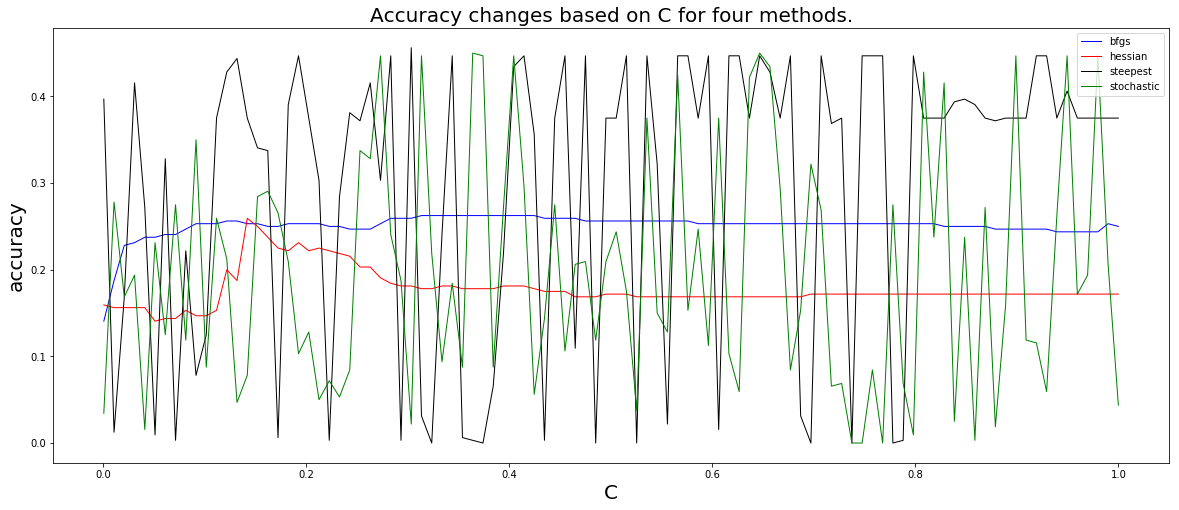

In [43]:
# Data
pdf=pd.DataFrame({'C': Cs, 'bfgs': res['bfgs'], 'hessian' : res['hessian'], 'steepest': res['steepest'], 'stochastic': res['stochastic'] })
plt.figure(figsize=(20, 8))
# multiple line plot
plt.plot( 'C', 'bfgs', data=pdf, color='blue', linewidth=1)
plt.plot( 'C', 'hessian', data=pdf,  color='red', linewidth=1)
plt.plot( 'C', 'steepest', data=pdf, color='black', linewidth=1)
plt.plot( 'C', 'stochastic', data=pdf, color='green', linewidth=1)
plt.title('Accuracy changes based on C for four methods.',fontsize=20)
plt.xlabel('C',fontsize=20)
plt.ylabel('accuracy',fontsize=20)
plt.legend()

We used different colors for 4 method but to find it's still hard to determine a accurate parameter for each method, we can see that hessian and bfgs is more stable than other two methods, and maybe their mean accuracy is lower than steepest(batch) and stochastic.
<br>To choose the best parameters, the second thought is to use a Grid Search for several parameters together, in this way we would not actually get the best parameters because we can only use several decided values on them, but it will choose the best performance for several parameters together. Since we're not sure how much these parameters will influence each other, a Grid Search seems to be a good choice.

### 5.2.2 Grid Search for several params.

We can do a grid searh for steepest method and stochastic together because they can have about the same parameters to test accuracy, however, the two second-derivative methods don't need iterations that much, so these methods will be seperated.

In [44]:
#code from 
#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#Examples section
from sklearn.model_selection import GridSearchCV
params = {'method':['steepest'],'C':[0.001, 0.01, 0.1, 1.0], 'eta':[0.001, 0.01, 0.1, 1], 'iterations':[1000, 1500, 2000, 2500], 'reg':['l1', 'l2', 'l1l2', 'none']}
rlr = RegularizedLogisticRegression()
clf = GridSearchCV(rlr, params)
clf.fit(X_train,y_train)
#instead of printing, make it look clean using df
pd.DataFrame(clf.cv_results_)
df =  pd.DataFrame(clf.cv_results_)
df.sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_eta,param_iterations,param_method,param_reg,params,...,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
88,0.005521,0.000346,0.322909,0.335344,0.01,0.01,2000,steepest,l1,"{'C': 0.01, 'eta': 0.01, 'iterations': 2000, '...",...,0.168618,0.145540,0.384977,0.437280,0.415493,0.423212,0.000487,0.000057,0.109935,0.134335
94,0.006011,0.000317,0.322909,0.335344,0.01,0.01,2500,steepest,l1l2,"{'C': 0.01, 'eta': 0.01, 'iterations': 2500, '...",...,0.168618,0.145540,0.384977,0.437280,0.415493,0.423212,0.000984,0.000027,0.109935,0.134335
81,0.005519,0.000419,0.322909,0.335344,0.01,0.01,1000,steepest,l2,"{'C': 0.01, 'eta': 0.01, 'iterations': 1000, '...",...,0.168618,0.145540,0.384977,0.437280,0.415493,0.423212,0.000334,0.000033,0.109935,0.134335
82,0.007425,0.000479,0.322909,0.335344,0.01,0.01,1000,steepest,l1l2,"{'C': 0.01, 'eta': 0.01, 'iterations': 1000, '...",...,0.168618,0.145540,0.384977,0.437280,0.415493,0.423212,0.001059,0.000072,0.109935,0.134335
83,0.007264,0.000951,0.322909,0.335344,0.01,0.01,1000,steepest,none,"{'C': 0.01, 'eta': 0.01, 'iterations': 1000, '...",...,0.168618,0.145540,0.384977,0.437280,0.415493,0.423212,0.001157,0.000669,0.109935,0.134335
84,0.007563,0.000463,0.322909,0.335344,0.01,0.01,1500,steepest,l1,"{'C': 0.01, 'eta': 0.01, 'iterations': 1500, '...",...,0.168618,0.145540,0.384977,0.437280,0.415493,0.423212,0.002218,0.000143,0.109935,0.134335
85,0.005944,0.000379,0.322909,0.335344,0.01,0.01,1500,steepest,l2,"{'C': 0.01, 'eta': 0.01, 'iterations': 1500, '...",...,0.168618,0.145540,0.384977,0.437280,0.415493,0.423212,0.000585,0.000058,0.109935,0.134335
86,0.005907,0.000946,0.322909,0.335344,0.01,0.01,1500,steepest,l1l2,"{'C': 0.01, 'eta': 0.01, 'iterations': 1500, '...",...,0.168618,0.145540,0.384977,0.437280,0.415493,0.423212,0.000428,0.000897,0.109935,0.134335
87,0.006197,0.000334,0.322909,0.335344,0.01,0.01,1500,steepest,none,"{'C': 0.01, 'eta': 0.01, 'iterations': 1500, '...",...,0.168618,0.145540,0.384977,0.437280,0.415493,0.423212,0.000799,0.000032,0.109935,0.134335
159,0.007772,0.000515,0.322909,0.335735,0.1,0.01,2500,steepest,none,"{'C': 0.1, 'eta': 0.01, 'iterations': 2500, 'm...",...,0.168618,0.145540,0.384977,0.438453,0.415493,0.423212,0.000890,0.000108,0.109935,0.134632


From the result above, we can tell for steepest, the parameter C/eta/reg didn't affect the result. When iteration reached 1000, even we keep rasing the value, the score is the same. 

In [45]:
#code from 
#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#Examples section
from sklearn.model_selection import GridSearchCV
params = {'method':['stochastic'],'C':[0.001, 0.01, 0.1, 1.0], 'eta':[0.001, 0.01, 0.1, 1], 'iterations':[1000, 1500, 2000, 2500], 'reg':['l1', 'l2', 'l1l2', 'none']}
rlr = RegularizedLogisticRegression()
clf = GridSearchCV(rlr, params)
clf.fit(X_train,y_train)
#instead of printing, make it look clean using df
df =  pd.DataFrame(clf.cv_results_)
df.sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_eta,param_iterations,param_method,param_reg,params,...,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
153,0.003093,0.000933,0.440188,0.402267,0.1,0.01,2000,stochastic,l2,"{'C': 0.1, 'eta': 0.01, 'iterations': 2000, 'm...",...,0.461358,0.400235,0.443662,0.383353,0.415493,0.423212,3.417854e-04,0.000620,0.018888,0.016336
132,0.002885,0.000662,0.420641,0.420633,0.1,0.001,1500,stochastic,l1,"{'C': 0.1, 'eta': 0.001, 'iterations': 1500, '...",...,0.461358,0.400235,0.384977,0.438453,0.415493,0.423212,5.301463e-04,0.000107,0.031400,0.015709
65,0.001749,0.000281,0.420641,0.420633,0.01,0.001,1000,stochastic,l2,"{'C': 0.01, 'eta': 0.001, 'iterations': 1000, ...",...,0.461358,0.400235,0.384977,0.438453,0.415493,0.423212,1.039430e-04,0.000005,0.031400,0.015709
37,0.002636,0.000492,0.412823,0.385463,0.001,0.1,1500,stochastic,l2,"{'C': 0.001, 'eta': 0.1, 'iterations': 1500, '...",...,0.459016,0.400235,0.502347,0.450176,0.276995,0.305979,3.957888e-04,0.000209,0.097605,0.059788
75,0.001604,0.000271,0.411259,0.409699,0.01,0.001,2000,stochastic,none,"{'C': 0.01, 'eta': 0.001, 'iterations': 2000, ...",...,0.374707,0.420188,0.443662,0.385698,0.415493,0.423212,2.706958e-05,0.000004,0.028315,0.017017
228,0.003419,0.000448,0.388585,0.374521,1,0.1,1500,stochastic,l1,"{'C': 1.0, 'eta': 0.1, 'iterations': 1500, 'me...",...,0.461358,0.400235,0.384977,0.438453,0.319249,0.284877,5.439089e-04,0.000101,0.058083,0.065280
36,0.003172,0.000542,0.388585,0.426096,0.001,0.1,1500,stochastic,l1,"{'C': 0.001, 'eta': 0.1, 'iterations': 1500, '...",...,0.344262,0.380282,0.406103,0.474795,0.415493,0.423212,1.032858e-04,0.000007,0.031611,0.038639
134,0.003263,0.000500,0.377639,0.375694,0.1,0.001,1500,stochastic,l1l2,"{'C': 0.1, 'eta': 0.001, 'iterations': 1500, '...",...,0.461358,0.400235,0.342723,0.385698,0.328638,0.341149,1.463788e-03,0.000120,0.059546,0.025138
102,0.001576,0.000267,0.375293,0.347558,0.01,0.1,1500,stochastic,l1l2,"{'C': 0.01, 'eta': 0.1, 'iterations': 1500, 'm...",...,0.461358,0.400235,0.248826,0.219226,0.415493,0.423212,6.743496e-07,0.000001,0.091314,0.091228
81,0.001620,0.000273,0.366693,0.356155,0.01,0.01,1000,stochastic,l2,"{'C': 0.01, 'eta': 0.01, 'iterations': 1000, '...",...,0.461358,0.400235,0.241784,0.259086,0.396714,0.409144,3.123031e-05,0.000005,0.092134,0.068735


In [46]:
params = {'method':['bfgs'],'C':[0.001, 0.01, 0.1, 1.0], 'eta':[0.001, 0.01, 0.1, 1], 'iterations':[2,5, 10, 20, 50], 'reg':['l1', 'l2', 'l1l2', 'none']}
rlr = RegularizedLogisticRegression()
clf = GridSearchCV(rlr, params)
clf.fit(X_train,y_train)
bfgsdf =  pd.DataFrame(clf.cv_results_)
bfgsdf.sort_values(by='mean_test_score',ascending=False)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_eta,param_iterations,param_method,param_reg,params,...,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
319,0.055078,0.000368,0.207193,0.192348,1,1,50,bfgs,none,"{'C': 1.0, 'eta': 1, 'iterations': 50, 'method...",...,0.274005,0.218310,0.152582,0.174678,0.194836,0.184056,0.001601,1.758632e-05,0.050343,0.018753
279,0.061150,0.000393,0.207193,0.192348,1,0.01,50,bfgs,none,"{'C': 1.0, 'eta': 0.01, 'iterations': 50, 'met...",...,0.274005,0.218310,0.152582,0.174678,0.194836,0.184056,0.005561,1.335333e-05,0.050343,0.018753
261,0.064470,0.000447,0.207193,0.192348,1,0.01,2,bfgs,l2,"{'C': 1.0, 'eta': 0.01, 'iterations': 2, 'meth...",...,0.274005,0.218310,0.152582,0.174678,0.194836,0.184056,0.002077,7.294544e-05,0.050343,0.018753
262,0.060811,0.000383,0.207193,0.192348,1,0.01,2,bfgs,l1l2,"{'C': 1.0, 'eta': 0.01, 'iterations': 2, 'meth...",...,0.274005,0.218310,0.152582,0.174678,0.194836,0.184056,0.005316,8.238388e-06,0.050343,0.018753
263,0.058141,0.000386,0.207193,0.192348,1,0.01,2,bfgs,none,"{'C': 1.0, 'eta': 0.01, 'iterations': 2, 'meth...",...,0.274005,0.218310,0.152582,0.174678,0.194836,0.184056,0.003797,3.381418e-05,0.050343,0.018753
264,0.064739,0.000643,0.207193,0.192348,1,0.01,5,bfgs,l1,"{'C': 1.0, 'eta': 0.01, 'iterations': 5, 'meth...",...,0.274005,0.218310,0.152582,0.174678,0.194836,0.184056,0.004787,1.887409e-04,0.050343,0.018753
265,0.062537,0.000386,0.207193,0.192348,1,0.01,5,bfgs,l2,"{'C': 1.0, 'eta': 0.01, 'iterations': 5, 'meth...",...,0.274005,0.218310,0.152582,0.174678,0.194836,0.184056,0.004489,7.348554e-06,0.050343,0.018753
266,0.070565,0.000371,0.207193,0.192348,1,0.01,5,bfgs,l1l2,"{'C': 1.0, 'eta': 0.01, 'iterations': 5, 'meth...",...,0.274005,0.218310,0.152582,0.174678,0.194836,0.184056,0.014324,1.108240e-05,0.050343,0.018753
267,0.071456,0.000401,0.207193,0.192348,1,0.01,5,bfgs,none,"{'C': 1.0, 'eta': 0.01, 'iterations': 5, 'meth...",...,0.274005,0.218310,0.152582,0.174678,0.194836,0.184056,0.012081,3.560047e-05,0.050343,0.018753
268,0.059963,0.000402,0.207193,0.192348,1,0.01,10,bfgs,l1,"{'C': 1.0, 'eta': 0.01, 'iterations': 10, 'met...",...,0.274005,0.218310,0.152582,0.174678,0.194836,0.184056,0.003519,4.449061e-06,0.050343,0.018753


From the result above, we can tell the parameters eta/iterations/reg didn't affect the accuracy for bfgs.

### 5.2.3 Visualize the performances

For each method, we will take the best parameters we chose from the grid search above, and compare their performances.
We will see what accuracy they can get, and how much time does it takes for each under their best condition.

Best parameters for steepest method is: eta=0.1, iterations=1000, reg = L2, C = 0.01.
<br>Best parameters for stochastic method is: eta=0.01, iterations=1000, reg = L2, C = 0.1.
<br>Best parameters for bgfs is: eta=0.1, iterations=2, reg = L2, C = 1.

In [49]:
import time
ite = 100
sgdscore = 0
batchscore = 0
bfgsscore = 0
sgdtime = 0
batchtime = 0
bfgstime = 0
scoredic = dict()
timedic = dict()
scoredic['stochastic'] = []
scoredic['steepest'] = []
scoredic['bfgs'] = []
timedic['stochastic'] = []
timedic['steepest'] = []
timedic['bfgs'] = []
for i in range(ite):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    y_train = y_train.as_matrix()
    y_test = y_test.as_matrix()
    sgdrlr = RegularizedLogisticRegression(eta=0.01, iterations=1000, method="stochastic", reg='l2', C = 0.01)
    batchrlr = RegularizedLogisticRegression(eta=0.1, iterations=1000, method="steepest", reg='l2', C = 0.1)
    bfgsrlr = RegularizedLogisticRegression(eta=0.1, iterations=2, method="bfgs", reg='l2', C = 1)
    begin = time.time()
    #stochastic
    sgdrlr.fit(X_train,y_train)
    yhat = sgdrlr.predict(X_test)
    sgdscore += accuracy_score(y_test,yhat)
    sgdtime += time.time() - begin
    scoredic['stochastic'].append(accuracy_score(y_test,yhat))
    timedic['stochastic'].append(time.time() - begin)
    begin = time.time()
    #steepest
    batchrlr.fit(X_train,y_train)
    yhat = batchrlr.predict(X_test)
    batchscore += accuracy_score(y_test,yhat)
    batchtime += time.time() - begin
    scoredic['steepest'].append(accuracy_score(y_test,yhat))
    timedic['steepest'].append(time.time() - begin)
    begin = time.time()
    #bfgs
    bfgsrlr.fit(X_train,y_train)
    yhat = bfgsrlr.predict(X_test)
    bfgsscore += accuracy_score(y_test,yhat)
    bfgstime += time.time() - begin
    scoredic['bfgs'].append(accuracy_score(y_test,yhat))
    timedic['bfgs'].append(time.time() - begin)
print("Stochastic: average accuracy is {}, average time is {}.".format(sgdscore / ite, sgdtime / 10))
print("Steepest: average accuracy is {}, average time is {}.".format(batchscore / ite, batchtime / 10))
print("Bfgs: average accuracy is {}, average time is {}.".format(bfgsscore / ite, bfgstime / 10))

Stochastic: average accuracy is 0.23640625000000004, average time is 0.6117674112319946.
Steepest: average accuracy is 0.19390625000000003, average time is 3.3584322690963746.
Bfgs: average accuracy is 0.19612500000000005, average time is 0.1669079303741455.


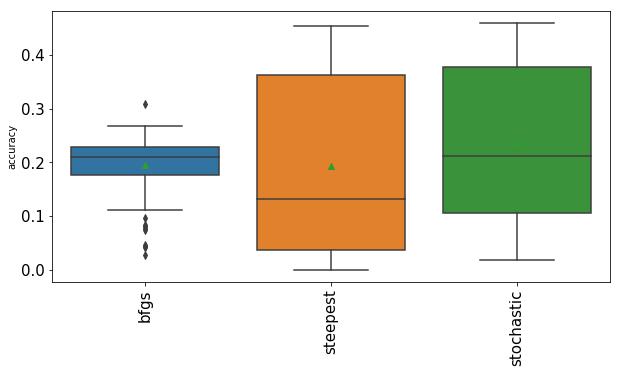

In [50]:
scoredf=pd.DataFrame(scoredic)
plt.figure(figsize=(10, 5))
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('accuracy')
sns.boxplot( data=scoredf, meanline=False, showmeans=True)

We can see from the result that both stochastic and bfgs method can get a better mean accuracy than steepest under their best circumstances, since stochastic will randomly choose one data, it can sometimes get really good. The std for bfgs method should be really small, it seems to be very stable, when it's the hessian method, it won't be always good,  there’s a chance it can not find a right solution when the start point is near saddle point, especially when it’s in high dimensional space, but bfgs is an absolute quadratic function, which will be stable, use momentum to update approximate hessian to let the point to have a better chance to find the extremum vales.

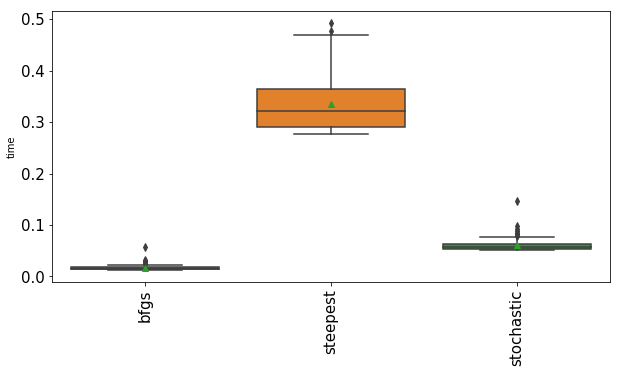

In [51]:
timedf=pd.DataFrame(timedic)
plt.figure(figsize=(10, 5))
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('time')
sns.boxplot( data=timedf, meanline=False, showmeans=True)

We can see from the time box plot, that bfgs method and stochastic method spend way less time the steepest method. 
<br>The stochastic method didn't use all the data to calculate gradients to get w, the bfgs use second-derivative to get the extreme value which take less iterations, so, the box plot seems reasonable. 

In terms of performance， stochastic method and bfgs method perform better in both time aspect and accuracy aspect. They both take less time, bfgs method will get a stable accuracy even it cann't get a high score. Stochastic method won't get a stable accuracy but the mean is higher.

### 5.2.4 About Data Snooping

In our case, there's definately data snooping exist, due to the train test split method we used.

We use Data snooping to tune some parameteters which are not particular fit to our model and optimize these parameters to make our model more accuracy. we split our dataset to two groups which are training set and test set.The test set can not be touched unless we test the final performance of our model. We can tune parameters by using data in the training set to make every parameters performance as well as possible. Once every parameter reach to the maximum performance, We can test our model using test set which was set earlier.

We use these sample ways to avaiod overfitting and underfitting. We can also using cross-validation to tune parameters rather than using data snooping.For these parameters,these can actually improve our accuracy of whole model. But some of parameters we use may not fit to other models or datasets.

## 6 Compare with Scikit-learn

In consider of accuracy is a more important metric, we will take the stochastic method to compare with the performance of Sklearn. In accuracy aspect and time aspect.

In [52]:
import time
from sklearn.linear_model import LogisticRegression as SKLogisticRegression
ite = 100
scoredic = dict()
timedic = dict()
scoredic['stochastic'] = []
scoredic['sklearn'] = []
timedic['stochastic'] = []
timedic['sklearn'] = []
for i in range(ite):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    y_train = y_train.as_matrix()
    y_test = y_test.as_matrix()
    sgdrlr = RegularizedLogisticRegression(eta=0.01, iterations=1000, method="stochastic", reg='l2', C = 0.01)
    skrlr = SKLogisticRegression()
    begin = time.time()
    #stochastic
    sgdrlr.fit(X_train,y_train)
    sgdtime = time.time() - begin
    yhat = sgdrlr.predict(X_test)    
    scoredic['stochastic'].append(accuracy_score(y_test,yhat))
    timedic['stochastic'].append(sgdtime)
    begin = time.time()
    #sklearn
    skrlr.fit(X_train,y_train)
    sktime = time.time() - begin
    yhat = skrlr.predict(X_test)    
    scoredic['sklearn'].append(accuracy_score(y_test,yhat))
    timedic['sklearn'].append(sktime)

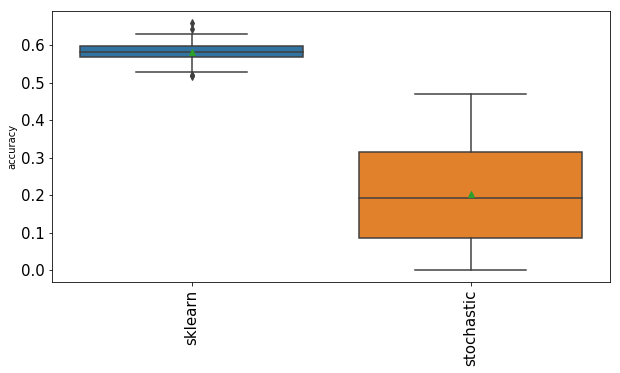

In [53]:
scoredf=pd.DataFrame(scoredic)

plt.figure(figsize=(10, 5))
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('accuracy')
sns.boxplot( data=scoredf, meanline=False, showmeans=True)

That's not even close! The best accuracy we can get is lower than the worst accuracy sklearn can get. And sklearn is really very stable, it won't get a big variance. 

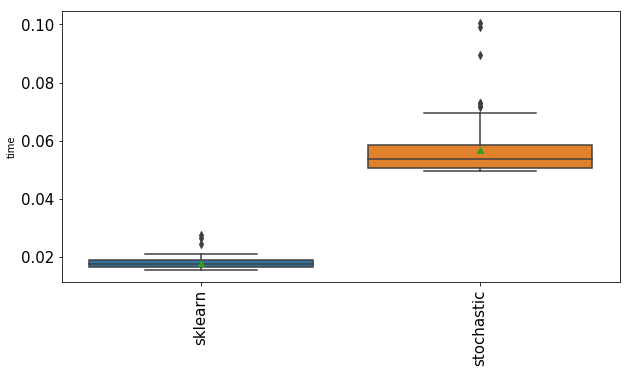

In [54]:
timedf=pd.DataFrame(timedic)

plt.figure(figsize=(10, 5))
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('time')
sns.boxplot( data=timedf, meanline=False, showmeans=True)

Even our best method can beat steepest method, but it's still take more time than sklearn, and I noticed there's some outliars take much more time. Give a consider that the scale of y axis is really small, I think in the time aspect, the stochastic method is good enough.

But Sklearn Rules.

# Deployment

<br>Our dataset only contains 1599 instances, not as small as iris_data but still, it's a small dataset, I think if we use a big dataset, like 60,000 instances, using stochastic method might take less time than sklearn method since it only take one row to calculate weight. However, we can't promise accuracy, the accuracy may get really low, but sckit-learn's accuracy is still pretty high(tested on another dataset). We can't sacrifice that much accuracy for time.
<br>When we are using a logistic regreesion implementation in a deployed machine learning model, I still will recommend scikit-learn. It has a really good performance in time and accuracy compared to our implementations. As a result, winemakers and buyers could use sckit-learn to help them judge the quality of wines. Not only could they save time and money in the processing of identifying wines' quality, they can also improve the accuracy of identifying wines' quality. 
<br>I think in our implement, there's still some improvements can be make. First, we can do a cross-validation train test split, by split the data into train, validate, test 3 parts, we can get a more accurate result by avoiding data snooping. Second, maybe we have only implemented one (something like neuron) in the neural network, and that make sence our accuracy is not good for multiple class regression. 
<br>Performance wise, we will choose sckit-learn in deployed machine learning model. We will continue to find a way to make our implement's performance close to sckit-learn's.
<br>It will be time-consuming and wasting money process to ask wine tasters for help nowadays. A variety of algorithmic models will make the process of identifying the quality of wine more digital and scientific. We tried to figure out an efficient and accurate method to identify wines' quality in this Lab. After comparision, skit-learn model still keep high accuracy and low time-consuming in the process. All in all, it is really convenient, eficient and scientific for winemakers and buyers identifying the quality of wines by using sckit-learn's model, instead of asking wine tasters for help. 

# Exceptional Work

Modified objective function to mean square error for newton. 
- 1.added mse_objective_function in RegularizedBinaryLogisticRegression
- 2.modified fit function in RegularizedBinaryLogisticRegression to add logic for mse

In [55]:
from scipy.special import expit
from numpy.linalg import pinv
from scipy.optimize import fmin_bfgs

np.seterr(over='print')

class RegularizedBinaryLogisticRegression:
    # extend init functions
    def __init__(self, eta=0.1, iterations=20,method="steepest", reg='l2', C=0.0, **kwds):        
        # need to add to the original initializer 
        self.C = C
        self.eta = eta
        self.iters = iterations 
        self.method = method
        self.reg = reg
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Regularized Vector Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Regularized Vector Binary Logistic Regression Object'
        
    # convenience, private:
    @staticmethod
    def _sigmoid(theta):
        # increase stability, redefine sigmoid operation
        return expit(theta) #1/(1+np.exp(-theta))
    
    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    @staticmethod
    def objective_function(w,X,y,C):
        g = expit(X @ w)
        return -np.sum(np.log(g[y==1]))-np.sum(np.log(1-g[y==0])) + C*sum(w**2) #-np.sum(y*np.log(g)+(1-y)*np.log(1-g))

    @staticmethod
    def objective_gradient(w,X,y,C):
        g = expit(X @ w)
        ydiff = y-g # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0)
        gradient = gradient.reshape(w.shape)
        gradient[1:] += -2 * w[1:] * C
        return -gradient
    
    @staticmethod
    def mse_objective_function(w,D,y,C):
        g = expit(D @ w)
        return np.sum((y - g)**2)
    
    # public:
    def predict_proba(self,X,add_bias=True):
        # add bias term if requested
        Xb = self._add_bias(X) if add_bias else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction
        

    def _get_gradient_steepest(self,X,y):
        ydiff = y-self.predict_proba(X,add_bias=False).ravel() # get y difference
        gradient = np.mean(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through          
        
        gradient[1:] += -2 * self.w_[1:].ravel().T * self.C    
        return gradient.reshape(self.w_.shape)
    
    def _get_gradient_stochastic(self,X,y):
        idx = int(np.random.rand()*len(y)) # grab random instance
        ydiff = y[idx]-self.predict_proba(X[idx],add_bias=False) # get y difference (now scalar)
        gradient = X[idx] * ydiff[:,np.newaxis] # make ydiff a column vector and multiply through
        
        return gradient.reshape(self.w_.shape)
        
        
    def _get_gradient_hessian(self,X,y):
        g = self.predict_proba(X,add_bias=False).ravel() # get sigmoid value for all classes
        hessian = X.T @ np.diag(g*(1-g)) @ X - 2 * self.C # calculate the hessian

        ydiff = y-g # get y difference
        gradient = np.sum(X * ydiff[:,np.newaxis], axis=0) # make ydiff a column vector and multiply through
        gradient = gradient.reshape(self.w_.shape)
        
        return pinv(hessian) @ gradient        
    
    
    def _get_gradient(self,X,y):
        #we will use stochastic, steepest and bfgs for the comparision, but we did implement hessian solution.
        if self.method == "stochastic":
            gradient = self._get_gradient_stochastic(X, y)
        elif self.method == "hessian":
            gradient = self._get_gradient_hessian(X, y)
        elif self.method == "steepest":
            gradient = self._get_gradient_steepest(X, y)
        else:
            raise ValueError('This method cannot be recognized.')
    
        if self.reg == "L2":
            gradient[1:] += -2 * self.w_[1:].ravel().T * self.C  
        elif self.reg == "L1":
            gradient[1:] += np.absolute(self.w_[1:].ravel().T) * self.C  # exclude bias term
        elif self.reg == "L1L2":
            gradient[1:] += (np.absolute(self.w_[1:].ravel().T) * self.C) + (-2 * self.w_[1:].ravel().T * self.C)
        else:
            pass
                
        return gradient
        
       # return gradient.reshape(self.w_.shape)
       
    # public:
    def fit(self, X, y):
        if(self.method == 'bfgs'):
            Xb = self._add_bias(X) # add bias term
            num_samples, num_features = Xb.shape

            self.w_ = fmin_bfgs(self.objective_function, # what to optimize
                                np.zeros((num_features,1)), # starting point
                                fprime=self.objective_gradient, # gradient function
                                args=(Xb,y,self.C), # extra args for gradient and objective function
                                gtol=1e-03, # stopping criteria for gradient, |v_k|
                                maxiter=self.iters, # stopping criteria iterations
                                disp=False)

            self.w_ = self.w_.reshape((num_features,1))
        elif(self.method == 'mse'):
            Xb = self._add_bias(X) # add bias term
            num_samples, num_features = Xb.shape

            self.w_ = fmin_bfgs(self.mse_objective_function, # what to optimize
                                np.zeros((num_features,1)), # starting point
                                fprime=self.objective_gradient, # gradient function
                                args=(Xb,y,self.C), # extra args for gradient and objective function
                                gtol=1e-03, # stopping criteria for gradient, |v_k|
                                maxiter=self.iters, # stopping criteria iterations
                                disp=False)

            self.w_ = self.w_.reshape((num_features,1))
        else:
            Xb = self._add_bias(X) # add bias term
            num_samples, num_features = Xb.shape

            self.w_ = np.zeros((num_features,1)) # init weight vector to zeros

            # for as many as the max iterations
            for _ in range(self.iters):
                gradient = self._get_gradient(Xb,y)
                self.w_ += gradient*self.eta # multiply by learning rate 

Now let's compare accuracy and time consuming between bfgs and the updated mse method. 
MSE should be able to solve the binary logistic regression problem in one gradient update step.
So I tested mse vs bfgs using the same parameter 

In [59]:
ite = 100
scoredic = dict()
timedic = dict()
scoredic['bfgs'] = []
scoredic['mse'] = []
timedic['bfgs'] = []
timedic['mse'] = []
for i in range(ite):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    y_train = y_train.as_matrix()
    y_test = y_test.as_matrix()
    bfgsrlr = RegularizedLogisticRegression(eta=0.1, iterations=2, method="bfgs", reg='l2', C = 1)
    mserlr = RegularizedLogisticRegression(eta=0.1, iterations=2, method="mse", reg='l2', C = 1)
    begin = time.time()
    #stochastic
    bfgsrlr.fit(X_train,y_train)
    bfgstime = time.time() - begin
    yhat = bfgsrlr.predict(X_test)    
    scoredic['bfgs'].append(accuracy_score(y_test,yhat))
    timedic['bfgs'].append(bfgstime)
    begin = time.time()
    #sklearn
    mserlr.fit(X_train,y_train)
    msetime = time.time() - begin
    yhat = mserlr.predict(X_test)    
    scoredic['mse'].append(accuracy_score(y_test,yhat))
    timedic['mse'].append(msetime)

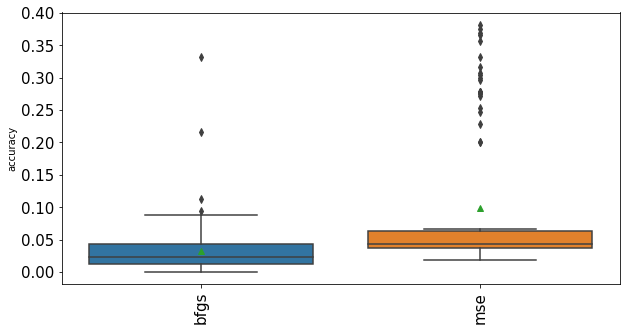

In [57]:
scoredf=pd.DataFrame(scoredic)

plt.figure(figsize=(10, 5))
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('accuracy')
sns.boxplot( data=scoredf, meanline=False, showmeans=True)

From the box plot, we can easily tell with 1 iteration, the average accuracy of using mse is much better than bfgs, there are also many cases mse gave a pretty good accuracy in only 1 iteration.

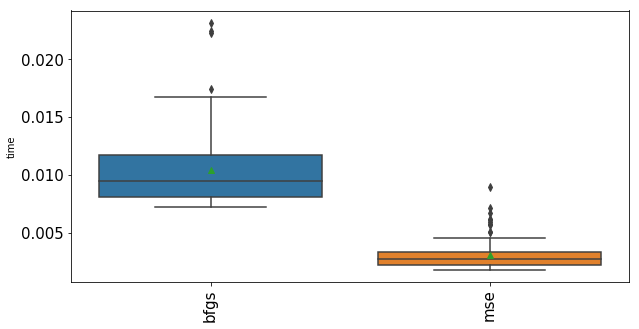

In [58]:
timedf=pd.DataFrame(timedic)

plt.figure(figsize=(10, 5))
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('time')
sns.boxplot( data=timedf, meanline=False, showmeans=True)

The time consuming is also obvious. The time consumed by mse is like half the time consumed by bfgs. This is for sure an improvment.

Now let's test again with 2 iterations. I just updated the iteration parameter in the test code above.

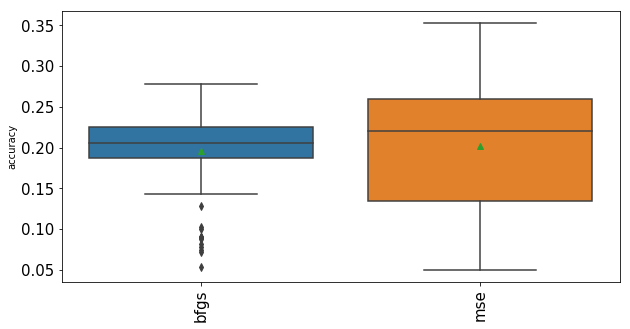

In [60]:
scoredf=pd.DataFrame(scoredic)

plt.figure(figsize=(10, 5))
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('accuracy')
sns.boxplot( data=scoredf, meanline=False, showmeans=True)

From the box plot here we could tell with 2 iterations bfgs could reach same accuracy with mse

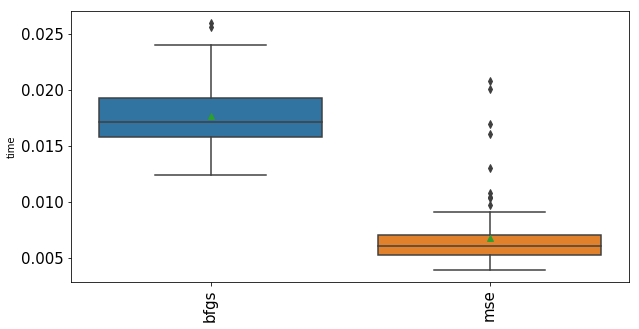

In [61]:
timedf=pd.DataFrame(timedic)

plt.figure(figsize=(10, 5))
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.ylabel('time')
sns.boxplot( data=timedf, meanline=False, showmeans=True)

From the box plot for time consuming here, it's still a big win for MSE.